# Using ML techniques to detect near-duplicate files in big data repositories

### training -> restricted index  |  testing -> all topics index  |  for reference -> matching

In [1]:
# pip install imblearn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
train_in = pd.read_csv("restricted_topics_datasets_index.csv")
train_m = pd.read_csv("restricted_topics_datasets_matching.csv")
test_in = pd.read_csv("all_topics_datasets_index.csv")
test_m = pd.read_csv("all_topics_datasets_matching.csv")

In [5]:
train_in.head()

,did,dataset_name,num_instances,num_attributes,dimensionality,num_numeric_attr,pct_numeric_attr,num_nominal_attr,pct_nominal_attr,avg_nominal_values,...,min_numeric_mean,max_numeric_mean,missing_attr_cnt,missing_attr_pct,missing_instances_max_cnt,missing_instances_max_pct,missing_instances_min_cnt,missing_instances_min_pct,missing_instances_mean,missing_instances_mean_pct
0,15,breast-w,699.0,10,1.430620,9,90.0,1,10.0,2.00000,...,2.0,4.0,1,10.0,16,2.28898,16,2.28898,1.6,0.228898
1,21,car,1728.0,7,0.405093,0,0.0,7,100.0,3.57143,...,0.0,0.0,0,0.0,0,0.00000,0,0.00000,0.0,0.000000
2,4540,ParkinsonSpeechDatasetwithMultipleTypesofSound...,1039.0,29,2.791150,29,100.0,0,0.0,0.00000,...,0.0,235.0,0,0.0,0,0.00000,0,0.00000,0.0,0.000000
3,1235,Agrawal1,1000000.0,10,0.001000,6,60.0,4,40.0,9.00000,...,16.0,250101.0,0,0.0,0,0.00000,0,0.00000,0.0,0.000000
4,487,papir_2,30.0,41,136.667000,41,100.0,0,0.0,0.00000,...,0.0,23.0,0,0.0,0,0.00000,0,0.00000,0.0,0.000000


In [6]:
train_m.head(10)

,did1,did2,dataset_name1,dataset_name2,num_instances,num_attributes,dimensionality,num_numeric_attr,pct_numeric_attr,num_nominal_attr,...,missing_attr_cnt,missing_attr_pct,missing_instances_max_cnt,missing_instances_max_pct,missing_instances_min_cnt,missing_instances_min_pct,missing_instances_mean,missing_instances_mean_pct,datesets_subject_main_match,datesets_duplicates_match
0,967,991,cars,car,0.765046,0.222222,0.817258,1.000000,1.000000,0.571429,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1,0
1,967,1092,cars,Crash,0.133005,0.357143,0.442646,0.142857,0.250000,0.500000,...,0.6,0.377778,0.878788,0.89491,0.333333,0.422003,0.800204,0.826778,1,0
2,967,1235,cars,Agrawal1,0.999594,0.100000,0.999549,0.000000,0.100000,0.250000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
3,967,1242,cars,vehicleNorm,0.995879,0.910891,0.953757,0.940000,0.326667,0.666667,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
4,967,1169,cars,airlines,0.999247,0.111111,0.999331,0.500000,0.437500,0.400000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
5,967,5587,cars,COMET_MC,0.999947,0.333333,0.999965,0.000000,0.333333,1.000000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
6,967,5648,cars,COMET_MC,0.999947,0.333333,0.999965,0.000000,0.333333,1.000000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
7,967,5889,cars,COMET_MC,0.999947,0.333333,0.999965,0.000000,0.333333,1.000000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
8,967,1076,cars,nasa_numeric,0.770936,0.625000,0.914101,0.333333,0.750000,0.850000,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0
9,967,1068,cars,pc1,0.633904,0.590909,0.105100,0.714286,0.301587,0.666667,...,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0,0


In [7]:
test_m.head(1)

,did1,did2,dataset_name1,dataset_name2,num_instances,num_attributes,dimensionality,num_numeric_attr,pct_numeric_attr,num_nominal_attr,...,missing_attr_cnt,missing_attr_pct,missing_instances_max_cnt,missing_instances_max_pct,missing_instances_min_cnt,missing_instances_min_pct,missing_instances_mean,missing_instances_mean_pct,datesets_subject_main_match,datesets_duplicates_match
0,171,185,primary-tumor,baseball,0.747015,0.0,0.747015,1.0,1.0,0.833333,...,0.8,0.8,0.870968,0.967357,0.95,0.80236,0.911111,0.977512,0,0


## Data Preprocessing

### Nulls and duplicated rows

In [8]:
train_in.isnull().sum()

did                           0
dataset_name                  0
num_instances                 0
num_attributes                0
dimensionality                0
num_numeric_attr              0
pct_numeric_attr              0
num_nominal_attr              0
pct_nominal_attr              0
avg_nominal_values            0
sd_nominal_values             0
min_nominal_values            0
max_nominal_values            0
avg_numeric_mean              0
sd_numeric_mean               0
min_numeric_mean              0
max_numeric_mean              0
missing_attr_cnt              0
missing_attr_pct              0
missing_instances_max_cnt     0
missing_instances_max_pct     0
missing_instances_min_cnt     0
missing_instances_min_pct     0
missing_instances_mean        0
missing_instances_mean_pct    0
dtype: int64

In [9]:
test_in.isnull().sum()

did                           0
dataset_name                  0
num_instances                 0
num_attributes                0
dimensionality                0
num_numeric_attr              0
pct_numeric_attr              0
num_nominal_attr              0
pct_nominal_attr              0
avg_nominal_values            0
sd_nominal_values             0
min_nominal_values            0
max_nominal_values            0
avg_numeric_mean              0
sd_numeric_mean               0
min_numeric_mean              0
max_numeric_mean              0
missing_attr_cnt              0
missing_attr_pct              0
missing_instances_max_cnt     0
missing_instances_max_pct     0
missing_instances_min_cnt     0
missing_instances_min_pct     0
missing_instances_mean        0
missing_instances_mean_pct    0
dtype: int64

In [10]:
train_m.duplicated().sum()

0

In [11]:
test_m.duplicated().sum()

0

### Dropping unnecessary columns

In [12]:
# drop the dataset name and id -> unuseful in training
train_in.drop(['dataset_name','did'], inplace = True, axis=1)
train_m.drop(['dataset_name1', 'dataset_name2','did1','did2'], inplace = True, axis=1)

In [13]:
test_in.drop(['dataset_name','did'], inplace = True, axis=1)
test_m.drop(['dataset_name1', 'dataset_name2','did1','did2'], inplace = True, axis=1)

In [14]:
test_in.columns

Index(['num_instances', 'num_attributes', 'dimensionality', 'num_numeric_attr',
       'pct_numeric_attr', 'num_nominal_attr', 'pct_nominal_attr',
       'avg_nominal_values', 'sd_nominal_values', 'min_nominal_values',
       'max_nominal_values', 'avg_numeric_mean', 'sd_numeric_mean',
       'min_numeric_mean', 'max_numeric_mean', 'missing_attr_cnt',
       'missing_attr_pct', 'missing_instances_max_cnt',
       'missing_instances_max_pct', 'missing_instances_min_cnt',
       'missing_instances_min_pct', 'missing_instances_mean',
       'missing_instances_mean_pct'],
      dtype='object')

In [15]:
train_m.columns

Index(['num_instances', 'num_attributes', 'dimensionality', 'num_numeric_attr',
       'pct_numeric_attr', 'num_nominal_attr', 'pct_nominal_attr',
       'avg_nominal_values', 'sd_nominal_values', 'min_nominal_values',
       'max_nominal_values', 'avg_numeric_mean', 'sd_numeric_mean',
       'min_numeric_mean', 'max_numeric_mean', 'missing_attr_cnt',
       'missing_attr_pct', 'missing_instances_max_cnt',
       'missing_instances_max_pct', 'missing_instances_min_cnt',
       'missing_instances_min_pct', 'missing_instances_mean',
       'missing_instances_mean_pct', 'datesets_subject_main_match',
       'datesets_duplicates_match'],
      dtype='object')

In [16]:
print('Train dataset: ' , train_m.shape)
print('Test dataset: ' , test_m.shape)

Train dataset:  (8385, 25)
Test dataset:  (22578, 25)


In [17]:
# restricted -> training
main_match = train_m["datesets_subject_main_match"].value_counts()
duplicates_match = train_m["datesets_duplicates_match"].value_counts()

print("Main matches for Rel(d1,d2):\n", main_match)
print("Duplicate matches for Dup(d1,d2):\n", duplicates_match)

Main matches for Rel(d1,d2):
 0    7180
1    1205
Name: datesets_subject_main_match, dtype: int64
Duplicate matches for Dup(d1,d2):
 0    8313
1      72
Name: datesets_duplicates_match, dtype: int64


The Problem here is **unbalanced data between 0 and 1 instances** in both columns "datesets_subject_main_match" and "datesets_duplicates_match"

In [18]:
# all topics -> testing
main_match_t = test_m["datesets_subject_main_match"].value_counts()
duplicates_match_t = test_m["datesets_duplicates_match"].value_counts()

print("Main matches for Rel(d1,d2):\n", main_match_t)
print("Duplicate matches for Dup(d1,d2):\n", duplicates_match_t)

Main matches for Rel(d1,d2):
 0    22008
1      570
Name: datesets_subject_main_match, dtype: int64
Duplicate matches for Dup(d1,d2):
 0    22450
1      128
Name: datesets_duplicates_match, dtype: int64


These are the **actual testing value counts** for both instances 0 and 1 in the output columns.

### Outliers

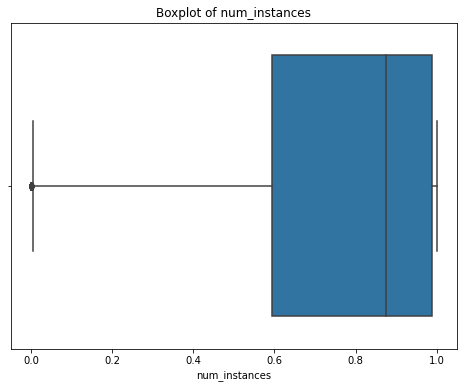

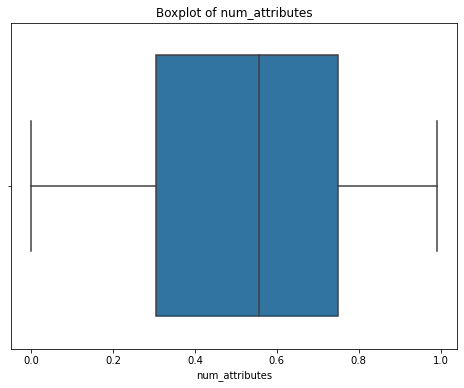

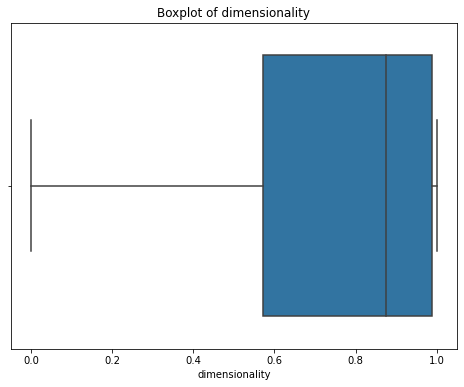

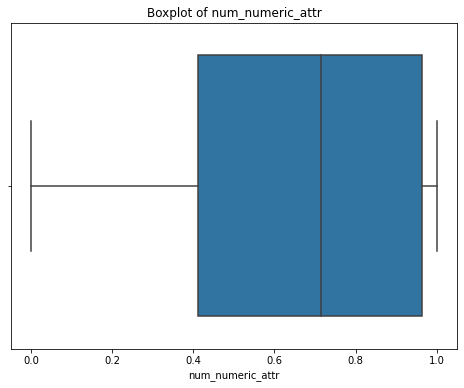

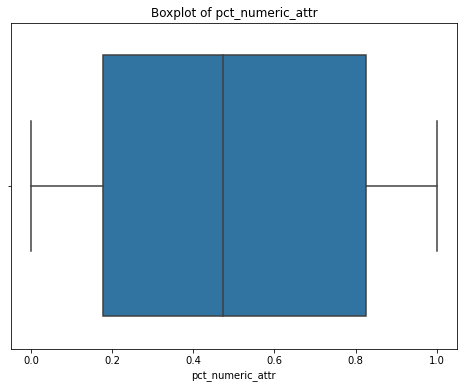

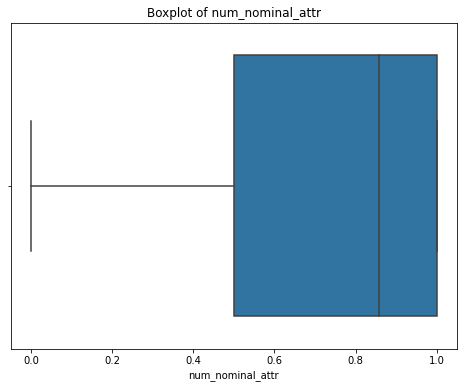

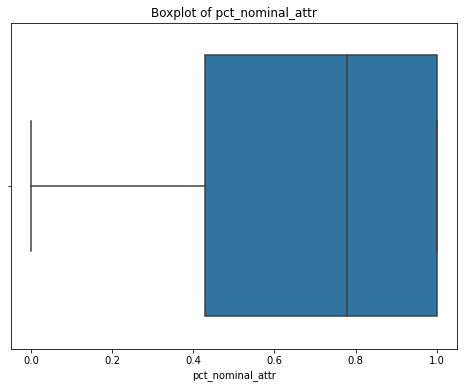

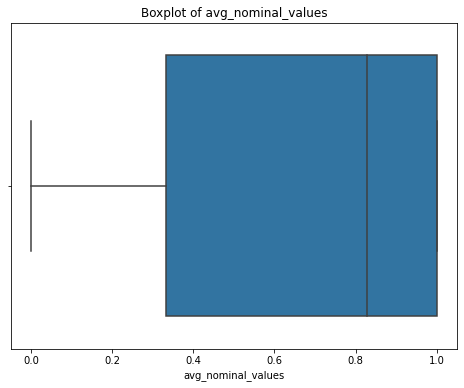

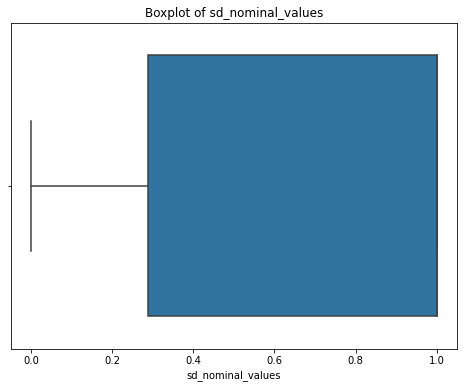

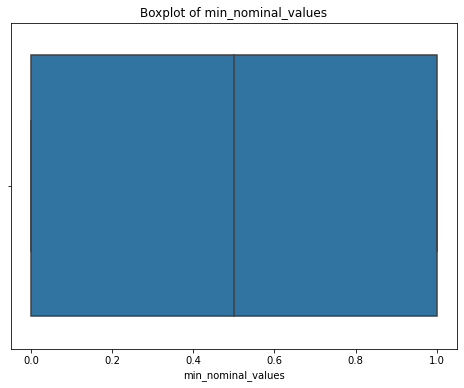

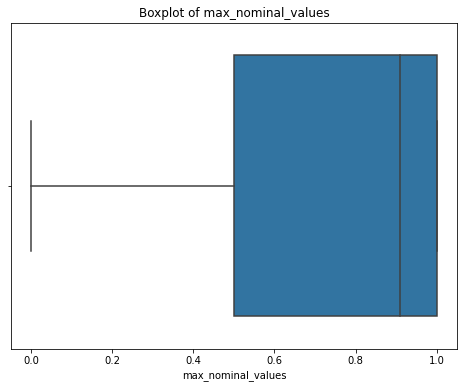

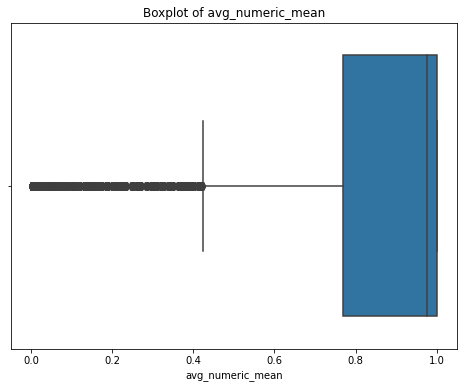

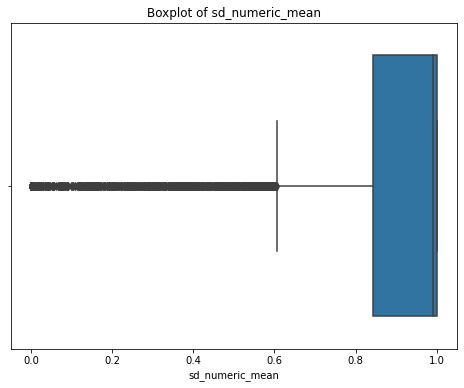

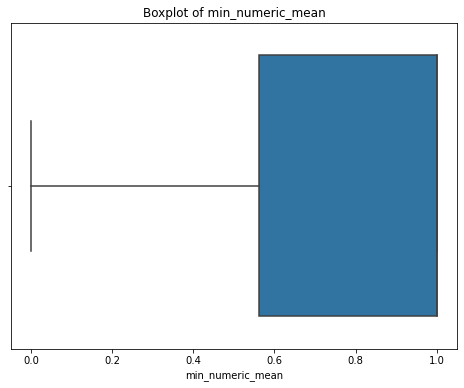

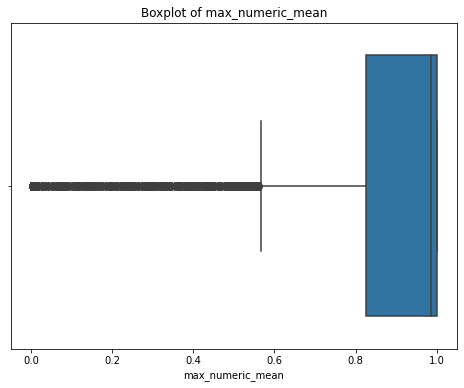

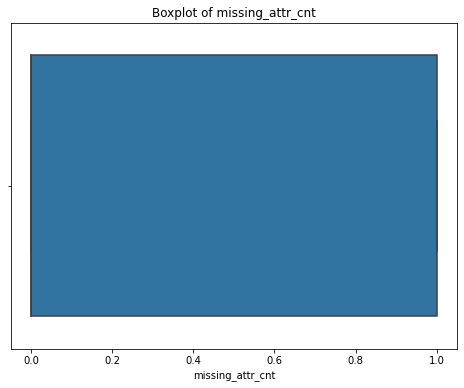

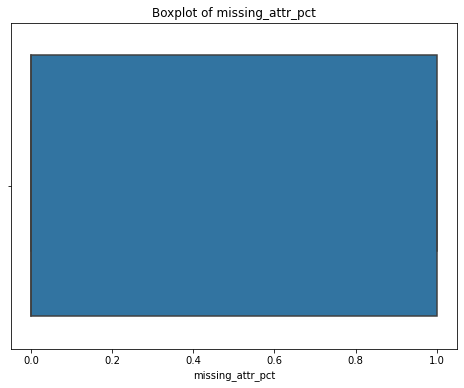

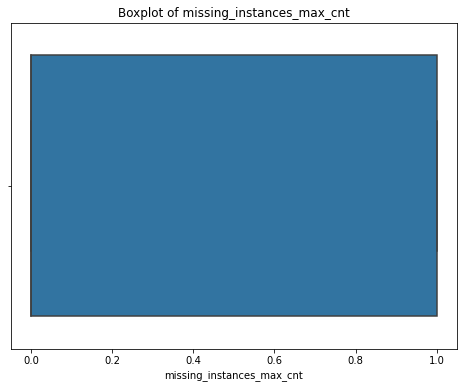

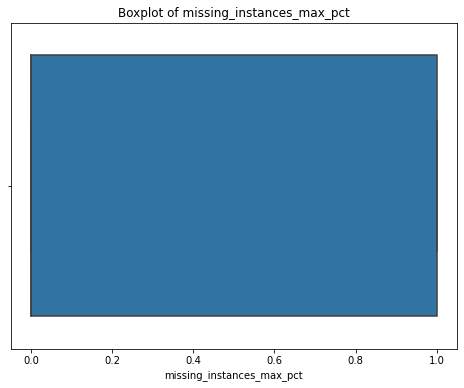

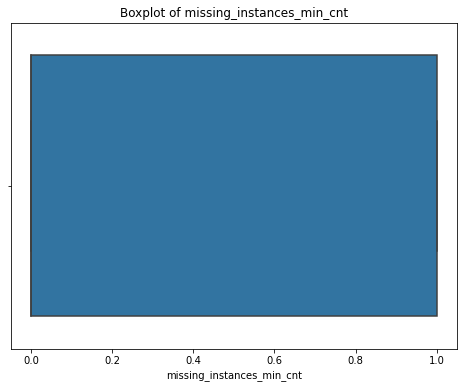

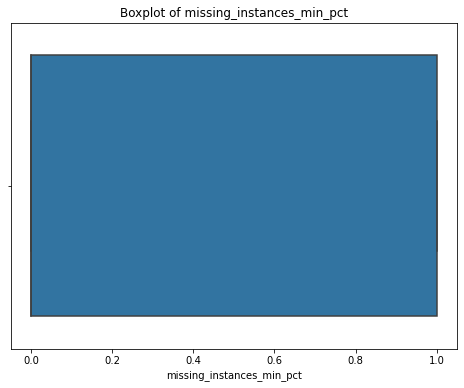

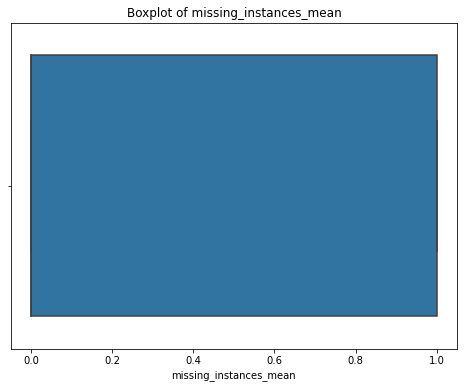

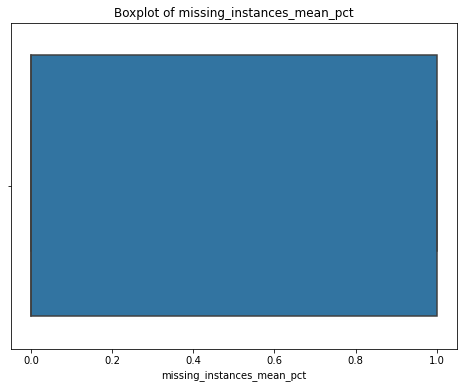

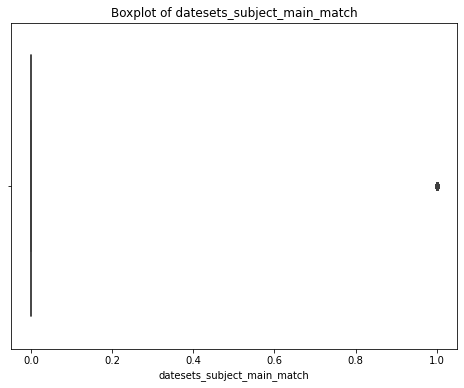

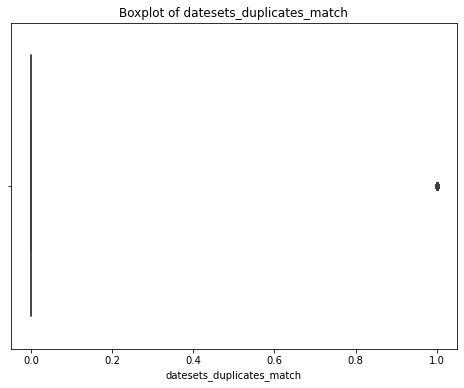

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(df):
    outliers_count = {}
    
    for column in df.columns:
        data = df[column]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outliers_count[column] = len(outliers)
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data)
        plt.title(f'Boxplot of {column}')
        plt.show()
        
    return outliers_count

outliers = detect_outliers(train_m)

In [20]:
print("The number of outliers in each column are: " ,outliers)

The number of outliers in each column are:  {'num_instances': 64, 'num_attributes': 0, 'dimensionality': 0, 'num_numeric_attr': 0, 'pct_numeric_attr': 0, 'num_nominal_attr': 0, 'pct_nominal_attr': 0, 'avg_nominal_values': 0, 'sd_nominal_values': 0, 'min_nominal_values': 0, 'max_nominal_values': 0, 'avg_numeric_mean': 1030, 'sd_numeric_mean': 1271, 'min_numeric_mean': 0, 'max_numeric_mean': 1210, 'missing_attr_cnt': 0, 'missing_attr_pct': 0, 'missing_instances_max_cnt': 0, 'missing_instances_max_pct': 0, 'missing_instances_min_cnt': 0, 'missing_instances_min_pct': 0, 'missing_instances_mean': 0, 'missing_instances_mean_pct': 0, 'datesets_subject_main_match': 1205, 'datesets_duplicates_match': 72}


Most of the columns are free from outliers but the We **will not remove the few columns that have outliers** as these outliers might have a **significant meaning** in the data instead of it being wrong values.

### trial 1 -> Unsupervised Kmeans clustering algorithm for generating Rel(d1,d2) and Dup(d1,d2)

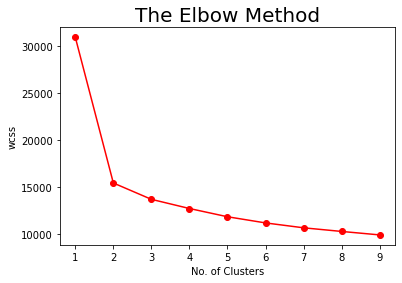

In [21]:
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally

wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(train_m)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

 We pick the elbow of the curve as the number of clusters to use as the elbow method plots the value of the cost function produced by different values of k so we choose the value that **minimizes** this function, **which is k=2.**

In [22]:
km_duplicates = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=20, random_state=0)
km_duplicates.fit(train_m)

# Get the cluster labels for 'datesets_duplicates_match'
labels_duplicates = km_duplicates.labels_
print(labels_duplicates)

# Assign the cluster labels to a new column called 'cluster_duplicates' in the original dataframe
df_m = train_m.copy()
df_m['cluster_duplicates'] = labels_duplicates

# Clustering for 'datesets_subject_main_match'
km_subject_main = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=20, random_state=0)
km_subject_main.fit(train_m)

# Get the cluster labels for 'datesets_subject_main_match'
labels_subject_main = km_subject_main.labels_
print(labels_subject_main)

# Assign the cluster labels to a new column called 'cluster_subject_main' in the original dataframe
df_m['cluster_subject_main'] = labels_subject_main


df_m.tail(10)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


,num_instances,num_attributes,dimensionality,num_numeric_attr,pct_numeric_attr,num_nominal_attr,pct_nominal_attr,avg_nominal_values,sd_nominal_values,min_nominal_values,...,missing_instances_max_cnt,missing_instances_max_pct,missing_instances_min_cnt,missing_instances_min_pct,missing_instances_mean,missing_instances_mean_pct,datesets_subject_main_match,datesets_duplicates_match,cluster_duplicates,cluster_subject_main
8375,0.558824,0.687500,0.291667,0.733333,0.146667,0.000000,0.687500,0.933333,0.0,0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1
8376,0.974227,0.848485,0.829897,0.878788,0.200000,1.000000,1.000000,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8377,0.500000,0.666667,0.833333,0.733333,0.200000,1.000000,1.000000,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8378,0.006623,0.285714,0.280952,0.500000,0.642857,0.800000,0.720000,0.827586,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8379,0.573333,0.978261,0.990725,1.000000,1.000000,0.995652,0.800000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8380,0.573333,0.979424,0.991221,1.000000,1.000000,0.995885,0.800000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8381,0.997000,0.978355,0.861400,0.979167,0.037500,0.974359,0.155844,0.998909,1.0,0.500000,...,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0
8382,0.999499,0.880952,0.995790,0.692308,0.613095,0.965517,0.710345,0.854271,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8383,0.996216,0.918033,0.953839,0.933333,0.186667,0.000000,0.918033,0.999950,0.0,0.999950,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
8384,0.997460,0.500000,0.994919,0.600000,0.200000,1.000000,1.000000,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1


In [23]:
df_m['cluster_subject_main'].value_counts(normalize=True)

1    0.517591
0    0.482409
Name: cluster_subject_main, dtype: float64

New proportions for the 0 and 1 instnaces **after clustering**

In [24]:
df_m['cluster_duplicates'].value_counts(normalize=True)

1    0.517591
0    0.482409
Name: cluster_duplicates, dtype: float64

vs the **original data proportions for the 0 and 1 instances** in both columns "datesets_subject_main_match" and "datesets_duplicates_match"

In [25]:
# Evaluate Cluster Purity: the extent to which each cluster contains predominantly one class of the target variable
def calculate_cluster_purity(cluster_labels, target_variable):
    num_clusters = np.unique(cluster_labels).shape[0]
    cluster_purities = []
    
    for cluster_label in range(num_clusters):
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        cluster_target_values = target_variable[cluster_indices]
        
        unique_classes, class_counts = np.unique(cluster_target_values, return_counts=True)
        majority_class_index = np.argmax(class_counts)
        majority_class_count = class_counts[majority_class_index]
        cluster_purity = majority_class_count / len(cluster_indices)
        
        cluster_purities.append(cluster_purity)
    
    return cluster_purities

cluster_purities_rel = calculate_cluster_purity(labels_subject_main, df_m['cluster_subject_main'])
print("Cluster purities Related for 0 and 1: ",cluster_purities_rel)

cluster_purities_dup = calculate_cluster_purity(labels_duplicates, df_m['cluster_duplicates'])
print("Cluster purities Duplicated for 0 and 1: ",cluster_purities_dup)

Cluster purities Related for 0 and 1:  [1.0, 1.0]
Cluster purities Duplicated for 0 and 1:  [1.0, 1.0]


*Cluster Purity* -> evaluates the clustering algorithm's performance in **separating the data into distinct groups that align with the distribution of the target variable.** It helps assess the level of agreement between the cluster assignments and the true labels. It calculates the cluster purity based on the **majority class in each cluster** and tells if each class or instance is very pure or not.

For this clustering algorithm the classes were in fact very pure and well seperated.

In [26]:
df_m['cluster_duplicates'].value_counts()

1    4340
0    4045
Name: cluster_duplicates, dtype: int64

In [27]:
df_m['cluster_subject_main'].value_counts()

1    4340
0    4045
Name: cluster_subject_main, dtype: int64

In [28]:
# testing
test_d = test_m.copy()

# Predict clusters for 'test_data' using the 'km_duplicates' model
test_labels_duplicates = km_duplicates.predict(test_d)

# Predict clusters for 'test_data' using the 'km_subject_main' model
test_labels_subject_main = km_subject_main.predict(test_d)

# Assuming your test dataframe is stored in a variable called 'test_df'

# Assign the cluster labels to a new column called 'cluster_duplicates' in the test dataframe
test_d['cluster_duplicates'] = test_labels_duplicates

# Assign the cluster labels to a new column called 'cluster_subject_main' in the test dataframe
test_d['cluster_subject_main'] = test_labels_subject_main

print(test_d['cluster_subject_main'].value_counts())
print(test_d['cluster_duplicates'].value_counts())

1    13490
0     9088
Name: cluster_subject_main, dtype: int64
1    13490
0     9088
Name: cluster_duplicates, dtype: int64


In [29]:
# original data
# Main matches for Rel(d1,d2):
#  0    22008
# 1      570
# Name: datesets_subject_main_match, dtype: int64
# Duplicate matches for Dup(d1,d2):
#  0    22450
# 1      128
# Name: datesets_duplicates_match, dtype: int64

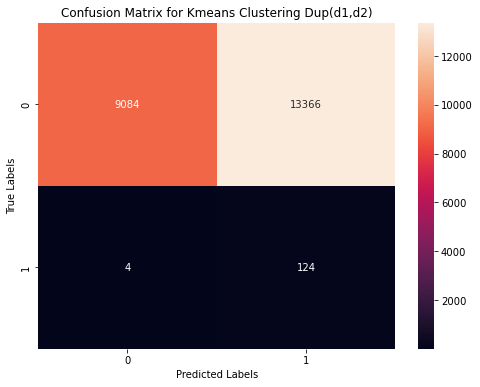

In [30]:
cm = confusion_matrix(test_d["datesets_duplicates_match"], test_d['cluster_duplicates'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Kmeans Clustering Dup(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

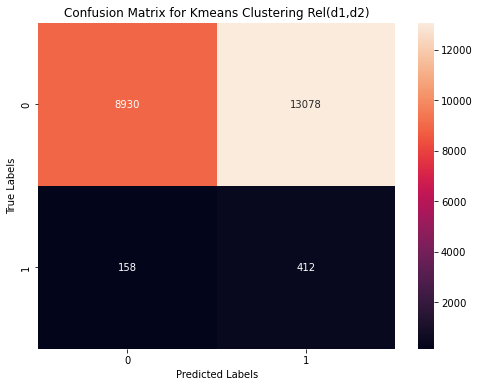

In [31]:
cm = confusion_matrix(test_d["datesets_subject_main_match"], test_d['cluster_subject_main'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Kmeans Clustering Rel(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The results in this trial **were very far from the actual results** as we can tell from the **very high False Positives (FP) and False Negatives (FN)** in the confusion matrix.

In [32]:
#For the "datesets_duplicates_match" clustering

# Calculate metrics for 'cluster_duplicates'
accuracy_duplicates = accuracy_score(test_d["datesets_duplicates_match"], test_d['cluster_duplicates'])
precision_duplicates = precision_score(test_d["datesets_duplicates_match"], test_d['cluster_duplicates'])
recall_duplicates = recall_score(test_d["datesets_duplicates_match"], test_d['cluster_duplicates'])
f1_score_duplicates = f1_score(test_d["datesets_duplicates_match"], test_d['cluster_duplicates'])

print("Metrics for kmeans clustering on 'cluster_duplicates'")
print("Accuracy:", accuracy_duplicates)
print("Precision:", precision_duplicates)
print("Recall:", recall_duplicates)
print("F1-score:", f1_score_duplicates)

Metrics for kmeans clustering on 'cluster_duplicates'
Accuracy: 0.40783063158827176
Precision: 0.009191994069681245
Recall: 0.96875
F1-score: 0.018211191070641796


In [33]:
# Calculate metrics for 'cluster_subject_main'
accuracy_subject_main = accuracy_score(test_d["datesets_subject_main_match"], test_d['cluster_subject_main'])
precision_subject_main = precision_score(test_d["datesets_subject_main_match"], test_d['cluster_subject_main'])
recall_subject_main = recall_score(test_d["datesets_subject_main_match"], test_d['cluster_subject_main'])
f1_score_subject_main = f1_score(test_d["datesets_subject_main_match"], test_d['cluster_subject_main'])

print("Metrics for kmeans clustering on 'cluster_subject_main'")
print("Accuracy:", accuracy_subject_main)
print("Precision:", precision_subject_main)
print("Recall:", recall_subject_main)
print("F1-score:", f1_score_subject_main)

Metrics for kmeans clustering on 'cluster_subject_main'
Accuracy: 0.4137656125431836
Precision: 0.030541141586360267
Recall: 0.7228070175438597
F1-score: 0.05860597439544809


### trial 2 -> Stratification on both columns "datesets_subject_main_match" and "datesets_duplicates_match"

In [32]:
# Rel
X_rel = df_m.drop(columns = ["datesets_duplicates_match","datesets_subject_main_match"])
y_rel = df_m["datesets_subject_main_match"]
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_rel, y_rel, train_size=0.8, stratify=y_rel)

# Dup
X_dup = df_m.drop(columns = ["datesets_subject_main_match","datesets_duplicates_match"])
y_dup = df_m["datesets_duplicates_match"]
x_trainD, x_testD, y_trainD, y_testD = train_test_split(X_dup, y_dup, train_size=0.8, stratify=y_dup)

In [33]:
y_trainR.value_counts(normalize=True)

0    0.856291
1    0.143709
Name: datesets_subject_main_match, dtype: float64

In [34]:
y_trainD.value_counts(normalize=True)

0    0.991354
1    0.008646
Name: datesets_duplicates_match, dtype: float64

These results show that since the dataset was stratified on the y label. So with that we will achieve **the same proportion as the population proportion.**

In [35]:
y_trainD.value_counts()

0    6650
1      58
Name: datesets_duplicates_match, dtype: int64

In [36]:
y_trainR.value_counts()

0    5744
1     964
Name: datesets_subject_main_match, dtype: int64

An improvement than the results of without stratification as now the **instance 1 is closer to instance 0** in sample size than before.

In [37]:
# Training Random forest classifier for dataset_duplicates_match column -  dup(d1,d2)

rf1 = RandomForestClassifier()

rf1.fit(x_trainD, y_trainD)

y1_pred = rf1.predict(x_testD)

accuracy1 = accuracy_score(y_testD, y1_pred)
precision1 = precision_score(y_testD, y1_pred)
recall1 = recall_score(y_testD, y1_pred)
f1_sc = f1_score(y_testD, y1_pred)

print("Validation Accuracy for Random Forest Classifier - Dup(d1,d2):", accuracy1)
print("Precision for Random Forest Classifier - Dup(d1,d2):", precision1)
print("Recall for Random Forest Classifier - Dup(d1,d2):", recall1)
print("F1 score for Random Forest Classifier - Dup(d1,d2):", f1_sc)

Validation Accuracy for Random Forest Classifier - Dup(d1,d2): 0.9976147883124628
Precision for Random Forest Classifier - Dup(d1,d2): 1.0
Recall for Random Forest Classifier - Dup(d1,d2): 0.7142857142857143
F1 score for Random Forest Classifier - Dup(d1,d2): 0.8333333333333333


In [38]:
# Random forest classifier for datesets_subject_main_match column  -  Rel(d1,d2)

rf2 = RandomForestClassifier()

rf2.fit(X_trainR, y_trainR)

y2_pred = rf2.predict(X_testR)

accuracy2 = accuracy_score(y_testR, y2_pred)
precision2 = precision_score(y_testR, y2_pred)
recall2 = recall_score(y_testR, y2_pred)
f1_sc2 = f1_score(y_testR, y2_pred)

print("Validation Accuracy for Random Forest Classifier - Rel(d1,d2):", accuracy2)
print("Precision for Random Forest Classifier - Rel(d1,d2):", precision2)
print("Recall for Random Forest Classifier - Rel(d1,d2):", recall2)
print("F1 score for Random Forest Classifier - Rel(d1,d2):", f1_sc2)

Validation Accuracy for Random Forest Classifier - Rel(d1,d2): 0.9463327370304114
Precision for Random Forest Classifier - Rel(d1,d2): 0.9631901840490797
Recall for Random Forest Classifier - Rel(d1,d2): 0.6514522821576764
F1 score for Random Forest Classifier - Rel(d1,d2): 0.7772277227722773


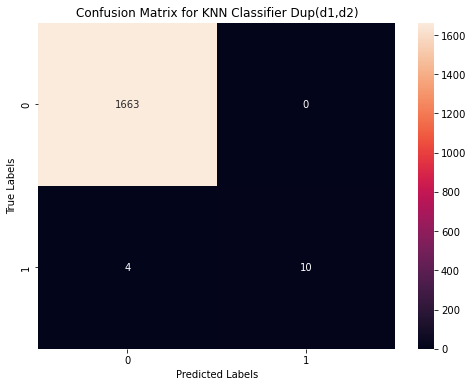

In [39]:
cm = confusion_matrix(y_testD, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for KNN Classifier Dup(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

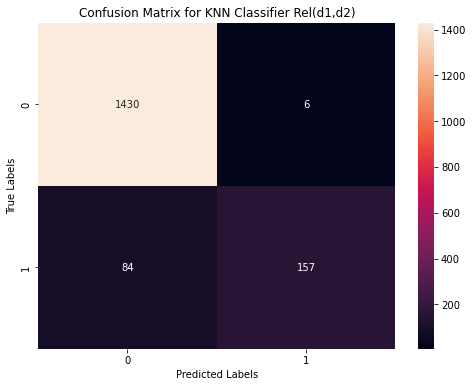

In [40]:
# testing
cm = confusion_matrix(y_testR, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for KNN Classifier Rel(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Here the results were **much improved** as there is a **significantly lower False Positives and Negatives** than the trial before.

In [41]:
new_test = test_m.copy()

yd_pred_test = rf1.predict(new_test)  # Dup(d1,d2)
ym_pred_test = rf2.predict(new_test)  # Rel(d1,d2)

new_test["Dup_match"] = yd_pred_test
new_test["Rel_match"] = ym_pred_test

print(new_test["Rel_match"].value_counts())
print(new_test["Dup_match"].value_counts())

C:\Users\nadin\anaconda3\envs\tensorf_gpu\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- datesets_duplicates_match
- datesets_subject_main_match
Feature names seen at fit time, yet now missing:
- cluster_duplicates
- cluster_subject_main

  warnings.warn(message, FutureWarning)
C:\Users\nadin\anaconda3\envs\tensorf_gpu\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- datesets_duplicates_match
- datesets_subject_main_match
Feature names seen at fit time, yet now missing:
- cluster_duplicates
- cluster_subject_main

  warnings.warn(message, FutureWarning)


0    22329
1      249
Name: Rel_match, dtype: int64
0    22528
1       50
Name: Dup_match, dtype: int64


In [42]:
# original data
# Main matches for Rel(d1,d2):
#  0    22008
# 1      570
# Name: datesets_subject_main_match, dtype: int64
# Duplicate matches for Dup(d1,d2):
#  0    22450
# 1      128
# Name: datesets_duplicates_match, dtype: int64

### trial 3 -> Clustering then Stratification

In [43]:
# Perform clustering on the 'Related' and 'Duplicated' columns
columns_to_cluster = ['datesets_subject_main_match', 'datesets_duplicates_match']
df_temp = df_m.copy()
X = df_temp[columns_to_cluster]

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

df_temp['Cluster'] = cluster_labels

# Determine the target sample size for double stratified sampling
target_sample_size = 8385  # Adjust this value as per your requirements

# Calculate the proportions of each cluster
cluster_counts = df_temp['Cluster'].value_counts()
proportions = cluster_counts / cluster_counts.sum()

# Calculate the subgroup sample sizes for double stratified sampling
sample_size_0 = int(np.ceil(proportions[0] * target_sample_size))
sample_size_1 = int(np.ceil(proportions[1] * target_sample_size))

# Perform double stratified sampling
sampled_data = pd.DataFrame()

for cluster_label in [0, 1]:
    cluster_df = df_temp[df_temp['Cluster'] == cluster_label]
    subgroup_sample_size = sample_size_0 if cluster_label == 0 else sample_size_1
    sampled_subgroup = cluster_df.sample(n=subgroup_sample_size, replace=True, random_state=42)
    sampled_data = pd.concat([sampled_data, sampled_subgroup])

# Perform stratification on the 0 instances only
stratified_sample_0 = sampled_data[sampled_data['datesets_subject_main_match'] == 0].sample(n=target_sample_size, replace=True, random_state=42)

# stratified_sample_0 contains the stratified sample of 0 instances only


In [44]:
sampled_data['datesets_subject_main_match'].value_counts()

0    7180
1    1205
Name: datesets_subject_main_match, dtype: int64

In [45]:
sampled_data['datesets_duplicates_match'].value_counts()

0    8305
1      80
Name: datesets_duplicates_match, dtype: int64

**No significant improvement in the unbalanced problem** for the dataset upon stratifying the 0 instances only.

# Classification Models

### trial 4 -> Over Sampling only

In [46]:
# Define the feature matrix and output labels
X = train_m.drop(['datesets_subject_main_match', 'datesets_duplicates_match'], axis=1)
y_rel = train_m['datesets_subject_main_match']
y_dup = train_m['datesets_duplicates_match']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)

X_train_resampledR, y_train_resampledR = smote.fit_resample(X, y_rel)
X_train_resampledD, y_train_resampledD = smote.fit_resample(X, y_dup)

# Apply train-test split again for resampled data
x_train_res_rel, x_test_res_rel, y_train_res_rel, y_test_res_rel = train_test_split(X_train_resampledR, y_train_resampledR, test_size=0.2, random_state=42)
x_train_res_dup, x_test_res_dup, y_train_res_dup, y_test_res_dup = train_test_split(X_train_resampledD, y_train_resampledD, test_size=0.2, random_state=42)


In [47]:
y_train_res_rel.value_counts()

0    5766
1    5722
Name: datesets_subject_main_match, dtype: int64

In [48]:
y_train_res_dup.value_counts()

1    6694
0    6606
Name: datesets_duplicates_match, dtype: int64

**Results were enhanced as the 1 and 0 instances became more balanced in both columns** hence we'll train and test the model that we chose which is **Random Forest Classifier**

In [49]:
# Training Random forest classifier for dataset_duplicates_match column -  dup(d1,d2)

rf_Dup = RandomForestClassifier()

rf_Dup.fit(x_train_res_dup, y_train_res_dup)

y1_pred = rf_Dup.predict(x_test_res_dup)

accuracy1 = accuracy_score(y_test_res_dup, y1_pred)
precision1 = precision_score(y_test_res_dup, y1_pred)
recall1 = recall_score(y_test_res_dup, y1_pred)
f1_score1 = f1_score(y_test_res_dup, y1_pred)

print("Validation Accuracy for Random Forest Classifier - Dup(d1,d2):", accuracy1)
print("Precision for Random Forest Classifier - Dup(d1,d2):", precision1)
print("Recall for Random Forest Classifier - Dup(d1,d2):", recall1)
print("F1 score for Random Forest Classifier - Dup(d1,d2):", f1_score1)

Validation Accuracy for Random Forest Classifier - Dup(d1,d2): 1.0
Precision for Random Forest Classifier - Dup(d1,d2): 1.0
Recall for Random Forest Classifier - Dup(d1,d2): 1.0
F1 score for Random Forest Classifier - Dup(d1,d2): 1.0


In [50]:
y1_pred_counts = pd.Series(y1_pred).value_counts()
print('Prediction Counts for Dup(d1,d2) after oversampling:\n',y1_pred_counts)

Prediction Counts for Dup(d1,d2) after oversampling:
 0    1707
1    1619
dtype: int64


In [51]:
# Random forest classifier for datesets_subject_main_match column  -  Rel(d1,d2)

rf_Rel = RandomForestClassifier()

rf_Rel.fit(x_train_res_rel, y_train_res_rel)

y2_pred = rf_Rel.predict(x_test_res_rel)

accuracy2 = accuracy_score(y_test_res_rel, y2_pred)
precision2 = precision_score(y_test_res_rel, y2_pred)
recall2 = recall_score(y_test_res_rel, y2_pred)
f1_score2 = f1_score(y_test_res_rel, y2_pred)

print("Validation Accuracy for Random Forest Classifier - Rel(d1,d2):", accuracy2)
print("Precision for Random Forest Classifier - Rel(d1,d2):", precision2)
print("Recall for Random Forest Classifier - Rel(d1,d2):", recall2)
print("F1 score for Random Forest Classifier - Rel(d1,d2):", f1_score2)

Validation Accuracy for Random Forest Classifier - Rel(d1,d2): 0.9571727019498607
Precision for Random Forest Classifier - Rel(d1,d2): 0.9658060013956734
Recall for Random Forest Classifier - Rel(d1,d2): 0.9492455418381345
F1 score for Random Forest Classifier - Rel(d1,d2): 0.9574541681079212


In [52]:
y2_pred_counts = pd.Series(y2_pred).value_counts()
print('Prediction Counts for Dup(d1,d2) after oversampling: \n', y2_pred_counts)

Prediction Counts for Dup(d1,d2) after oversampling: 
 0    1439
1    1433
dtype: int64


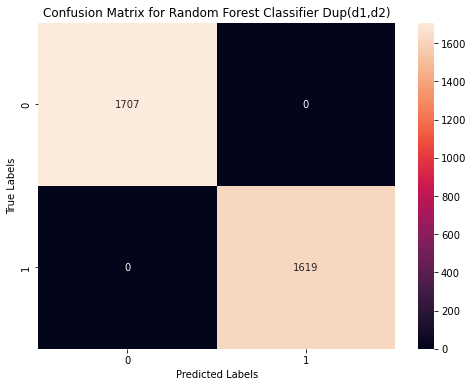

In [53]:
cm = confusion_matrix(y_test_res_dup, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier Dup(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

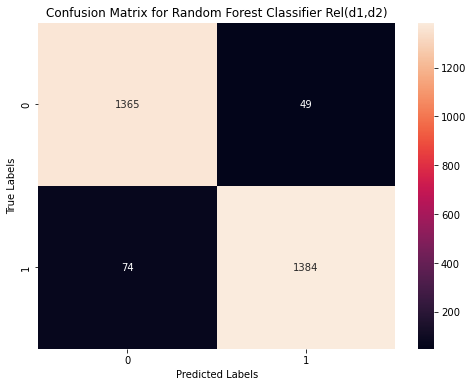

In [54]:
cm = confusion_matrix(y_test_res_rel, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier Rel(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

This model trained so well on the 'datesets_duplicates_match' column but there was a higher error for the "datesets_subject_main_match"

In [55]:
xnew_testt = test_m.drop(columns=['datesets_subject_main_match','datesets_duplicates_match'])

yd_pred_test = rf_Dup.predict(xnew_testt)  # Dup(d1,d2)
ym_pred_test = rf_Rel.predict(xnew_testt)  # Rel(d1,d2)

xnew_testt["Dup_match3"] = yd_pred_test
xnew_testt["Rel_match3"] = ym_pred_test

print(xnew_testt["Rel_match3"].value_counts())
print(xnew_testt["Dup_match3"].value_counts())

0    21093
1     1485
Name: Rel_match3, dtype: int64
0    22504
1       74
Name: Dup_match3, dtype: int64


In [56]:
# original data
# Main matches for Rel(d1,d2):
#  0    22008
# 1      570
# Name: datesets_subject_main_match, dtype: int64
# Duplicate matches for Dup(d1,d2):
#  0    22450
# 1      128
# Name: datesets_duplicates_match, dtype: int64

### trial 5 -> Stratification + Over Sampling

In [57]:
# Define the feature matrix and output labels
X = train_m.drop(['datesets_subject_main_match', 'datesets_duplicates_match'], axis=1)
y_rel = train_m['datesets_subject_main_match']
y_dup = train_m['datesets_duplicates_match']

# Perform stratified sampling on 'Related' column
x_train_rel, x_test_rel, y_train_rel, y_test_rel = train_test_split(X, y_rel, test_size=0.2, stratify=y_rel, random_state=42)

# Perform stratified sampling on 'Duplicated' column
x_train_dup, x_test_dup, y_train_dup, y_test_dup = train_test_split(X, y_dup, test_size=0.2, stratify=y_dup, random_state=42)

Stratification ensures **proportional representation of both instances 0 and 1 in the sample.** This approach allows you to address the imbalance issue in each column **independently and ensure a representative sample of both categories.**

In [58]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)

X_train_resampledR, y_train_resampledR = smote.fit_resample(x_train_rel, y_train_rel)
X_train_resampledD, y_train_resampledD = smote.fit_resample(x_train_dup, y_train_dup)

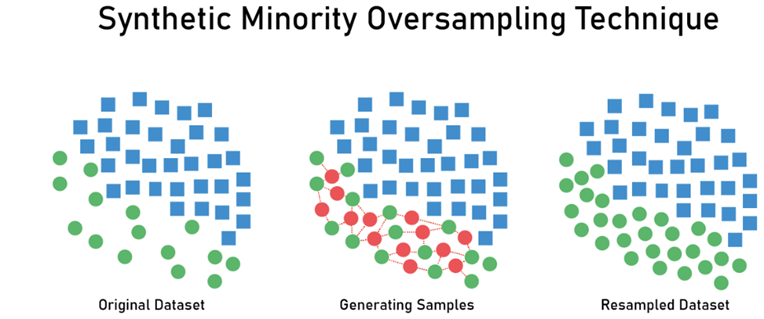

To increase the representation of 1 instances in the training data. I used **Synthetic Minority Over-sampling Technique** (SMOTE) which creates synthetic examples of the minority class (class 1) to balance the dataset. It focuses on the **feature space to generate new instances with the help of interpolation** between the positive instances that lie together.

**SMOTE works by:**
- Selecting examples that are close in the feature space.
- Drawing a line between the examples in the feature space.
- And drawing a new sample at a point along that line.

In [59]:
y_train_resampledR.value_counts()

1    5744
0    5744
Name: datesets_subject_main_match, dtype: int64

In [60]:
y_train_resampledD.value_counts()

0    6650
1    6650
Name: datesets_duplicates_match, dtype: int64

Here after applying oversampling the data became **perfectly balanced equally considering both 0 and 1 instances** while there is a good sample size for data to be used for model training.

In [61]:
# Apply train-test split again for resampled data
x_train_res_rel, x_test_res_rel, y_train_res_rel, y_test_res_rel = train_test_split(X_train_resampledR, y_train_resampledR, test_size=0.2, random_state=42)
x_train_res_dup, x_test_res_dup, y_train_res_dup, y_test_res_dup = train_test_split(X_train_resampledD, y_train_resampledD, test_size=0.2, random_state=42)

Next -> Training a **random forest** model on the new training data after applying **stratification for our data and oversampling using SMOTE.**

In [62]:
# Training Random forest classifier for dataset_duplicates_match column -  dup(d1,d2)

rf_Dup = RandomForestClassifier()

rf_Dup.fit(x_train_res_dup, y_train_res_dup)

y1_pred = rf_Dup.predict(x_test_res_dup)

accuracy1 = accuracy_score(y_test_res_dup, y1_pred)
precision1 = precision_score(y_test_res_dup, y1_pred)
recall1 = recall_score(y_test_res_dup, y1_pred)
f1_score1 = f1_score(y_test_res_dup, y1_pred)

print("Validation Accuracy for Random Forest Classifier - Dup(d1,d2):", accuracy1)
print("Precision for Random Forest Classifier - Dup(d1,d2):", precision1)
print("Recall for Random Forest Classifier - Dup(d1,d2):", recall1)
print("F1 score for Random Forest Classifier - Dup(d1,d2):", f1_score1)

Validation Accuracy for Random Forest Classifier - Dup(d1,d2): 0.999624060150376
Precision for Random Forest Classifier - Dup(d1,d2): 0.9992565055762082
Recall for Random Forest Classifier - Dup(d1,d2): 1.0
F1 score for Random Forest Classifier - Dup(d1,d2): 0.9996281145407214


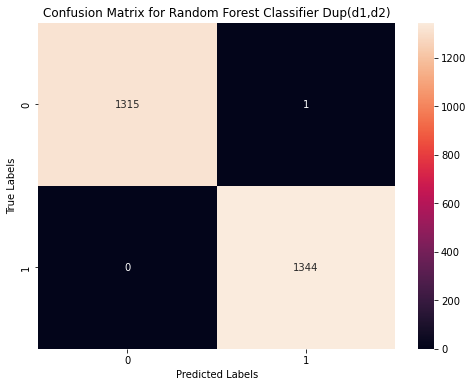

In [63]:
cm = confusion_matrix(y_test_res_dup, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier Dup(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The confusion matrix above indicates that **almost all predictions are correct** with 1315 True Negatives (TN) and 1344 True Positives (TP), **1 False Positive (FP) and no False Negative (FN) values**

In [64]:
# Random forest classifier for datesets_subject_main_match column  -  Rel(d1,d2)

rf_Rel = RandomForestClassifier()

rf_Rel.fit(x_train_res_rel, y_train_res_rel)

y2_pred = rf_Rel.predict(x_test_res_rel)

accuracy2 = accuracy_score(y_test_res_rel, y2_pred)
precision2 = precision_score(y_test_res_rel, y2_pred)
recall2 = recall_score(y_test_res_rel, y2_pred)
f1_score2 = f1_score(y_test_res_rel, y2_pred)

print("Validation Accuracy for Random Forest Classifier - Rel(d1,d2):", accuracy2)
print("Precision for Random Forest Classifier - Rel(d1,d2):", precision2)
print("Recall for Random Forest Classifier - Rel(d1,d2):", recall2)
print("F1 score for Random Forest Classifier - Rel(d1,d2):", f1_score2)

Validation Accuracy for Random Forest Classifier - Rel(d1,d2): 0.9477806788511749
Precision for Random Forest Classifier - Rel(d1,d2): 0.9444926279271466
Recall for Random Forest Classifier - Rel(d1,d2): 0.9510917030567686
F1 score for Random Forest Classifier - Rel(d1,d2): 0.947780678851175


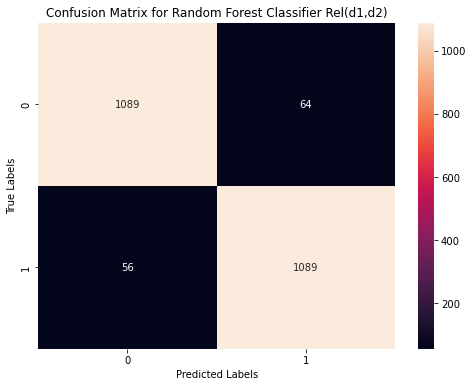

In [65]:
cm = confusion_matrix(y_test_res_rel, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier Rel(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The confusion matrix above has 1364 True Negative (TN) and 1382 True Positive (TP) values which means that the **majority of predictions were corect** but there is a **slightly higher error** for the **'datesets_subject_main_match'** output as there are  are 64 False Positives (FP) and 56 False Negatives (FN)

In [66]:
xn_test = test_m.drop(columns=['datesets_subject_main_match','datesets_duplicates_match'])

yd_pred_test = rf_Dup.predict(xn_test)  # Dup(d1,d2)
ym_pred_test = rf_Rel.predict(xn_test)  # Rel(d1,d2)

xn_test["Dup_match2"] = yd_pred_test
xn_test["Rel_match2"] = ym_pred_test

print(xn_test["Rel_match2"].value_counts())
print(xn_test["Dup_match2"].value_counts())

0    20803
1     1775
Name: Rel_match2, dtype: int64
0    22504
1       74
Name: Dup_match2, dtype: int64


In [67]:
# original data
# Main matches for Rel(d1,d2):
#  0    22008
# 1      570
# Name: datesets_subject_main_match, dtype: int64
# Duplicate matches for Dup(d1,d2):
#  0    22450
# 1      128
# Name: datesets_duplicates_match, dtype: int64

### trial 6 -> stratification for 1 instances only for both columns + stratification on both instances for both columns + Over Sampling

In [68]:
# Determine the target sample size for stratification on 1 instance in 'datesets_duplicates_match' column
target_sample_size_1_duplicates = 8385  # Adjust this value as per your requirements

# Perform stratification on 1 instance in 'datesets_duplicates_match' column
stratified_sample_1_duplicates = df_m[df_m['datesets_duplicates_match'] == 1].sample(n=target_sample_size_1_duplicates, replace=True, random_state=42)

# Determine the target sample size for stratification on 1 instance in 'datesets_subject_main_match' column
target_sample_size_1_subject = 8385  # Adjust this value as per your requirements

# Perform stratification on 1 instance in 'datesets_subject_main_match' column
stratified_sample_1_subject = df_m[df_m['datesets_subject_main_match'] == 1].sample(n=target_sample_size_1_subject, replace=True, random_state=42)

# Determine the target sample size for stratification on both instances
target_sample_size_both = 8385  # Adjust this value as per your requirements

# Perform stratification on both instances
stratified_sample_both = df_m.sample(n=target_sample_size_both, replace=True, random_state=42)

# Concatenate the samples
stratified_sample = pd.concat([stratified_sample_1_duplicates, stratified_sample_1_subject, stratified_sample_both])

# Split the sample into train and test sets
train_set, test_set = train_test_split(stratified_sample, test_size=0.2, random_state=42)


In [69]:
stratified_sample.head()

,num_instances,num_attributes,dimensionality,num_numeric_attr,pct_numeric_attr,num_nominal_attr,pct_nominal_attr,avg_nominal_values,sd_nominal_values,min_nominal_values,...,missing_instances_max_cnt,missing_instances_max_pct,missing_instances_min_cnt,missing_instances_min_pct,missing_instances_mean,missing_instances_mean_pct,datesets_subject_main_match,datesets_duplicates_match,cluster_duplicates,cluster_subject_main
4758,0.108911,0.000000,0.108911,0.461538,0.461538,0.857143,0.857143,0.263158,1.000000,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0
2681,0.000000,0.000000,0.000000,1.000000,1.000000,0.470588,0.470588,0.075650,0.146349,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
8132,0.975664,0.000000,0.975664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
5973,0.000625,0.000000,0.000625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
3632,0.581633,0.071429,0.549451,0.416667,0.458333,0.857143,0.846154,0.457143,1.000000,0.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0,0


In [70]:
stratified_sample['datesets_duplicates_match'].value_counts()

0    16194
1     8961
Name: datesets_duplicates_match, dtype: int64

In [71]:
stratified_sample['datesets_subject_main_match'].value_counts()

1    17953
0     7202
Name: datesets_subject_main_match, dtype: int64

In [72]:
X = stratified_sample.drop(['datesets_subject_main_match', 'datesets_duplicates_match'], axis=1)

smote_dup = SMOTE(random_state=42)
X_train_resampled_dup, y_train_resampled_dup = smote_dup.fit_resample(X, stratified_sample['datesets_duplicates_match'])

# Apply SMOTE for oversampling on 'datesets_subject_main_match' column
smote_rel = SMOTE(random_state=42)
X_train_resampled_rel, y_train_resampled_rel = smote_rel.fit_resample(X, stratified_sample['datesets_subject_main_match'])

# Apply train-test split again for resampled data in 'datesets_duplicates_match' column
x_train_res_dup, x_test_res_dup, y_train_res_dup, y_test_res_dup = train_test_split(X_train_resampled_dup, y_train_resampled_dup, test_size=0.2, random_state=42)

# Apply train-test split again for resampled data in 'datesets_subject_main_match' column
x_train_res_rel, x_test_res_rel, y_train_res_rel, y_test_res_rel = train_test_split(X_train_resampled_rel, y_train_resampled_rel, test_size=0.2, random_state=42)


In [73]:
y_train_res_dup.value_counts()

1    12981
0    12929
Name: datesets_duplicates_match, dtype: int64

In [74]:
y_train_res_rel.value_counts()

0    14414
1    14310
Name: datesets_subject_main_match, dtype: int64

**The sampled data became more** in this approach and this was expected to yield better results as the model **would train on larger balanced data.**

-> We will train on 2 different models **K-Nearest Neighbours and Random Forest Classifier**

### A distance-based algorithm: K-Nearest Neighbours (KNN)

In [75]:
# Split the data into training and test sets (validation)
xd_train, xd_test, yd_train, yd_test = train_test_split(x_train_res_dup, y_train_res_dup, test_size=0.2)
xm_train, xm_test, ym_train, ym_test = train_test_split(x_train_res_rel, y_train_res_rel, test_size=0.2)

In [76]:
print('Train dataset: ' , xd_train.shape)
print('Test dataset: ' , test_m.shape)

Train dataset:  (20728, 25)
Test dataset:  (22578, 25)


In [77]:
# K-Nearest Neighbors Classifier for dataset_duplicates_match column -  dup(d1,d2)

knn1 = KNeighborsClassifier()

knn1.fit(xd_train,yd_train)
result1 =knn1.predict(xd_test)

acc1 = accuracy_score(yd_test, result1)
prec1 = precision_score(yd_test, result1)
rec1 = recall_score(yd_test, result1)
f1 = f1_score(yd_test, result1)

print("Validation Accuracy for KNN Classifier - Dup(d1,d2):", acc1)
print("Precision for KNN Classifier - Dup(d1,d2):", prec1)
print("Recall for KNN Classifier - Dup(d1,d2):", rec1)
print("F1 score for KNN Classifier - Dup(d1,d2):", f1)

Validation Accuracy for KNN Classifier - Dup(d1,d2): 0.999421072944809
Precision for KNN Classifier - Dup(d1,d2): 0.9988434849653045
Recall for KNN Classifier - Dup(d1,d2): 1.0
F1 score for KNN Classifier - Dup(d1,d2): 0.9994214079074253


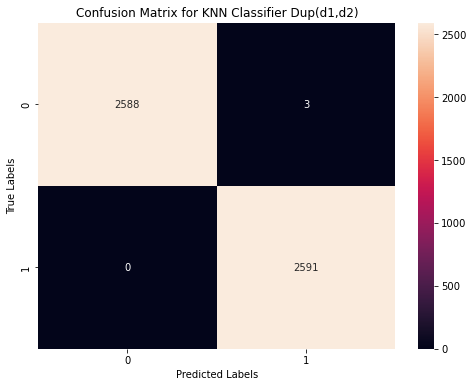

In [78]:
cm = confusion_matrix(yd_test, result1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for KNN Classifier Dup(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

As clear in this confusion matrix above that almost **all predictions are correct** which represent the **high** True Negative (TN) and True Positive (TP) values whereas there were only **3 False Positive (FP) and 0 False Negative (FN) values**

In [79]:
# K-Nearest Neighbors Classifier for datesets_subject_main_match column  -  Rel(d1,d2)

knn2 = KNeighborsClassifier()

knn2.fit(xm_train,ym_train)
result2 =knn2.predict(xm_test)

acc2 = accuracy_score(ym_test, result2)
prec2 = precision_score(ym_test, result2)
rec2 = recall_score(ym_test, result2)
f2 = f1_score(ym_test, result2)

print("Validation Accuracy for KNN Classifier - Rel(d1,d2):", acc2)
print("Precision for KNN Classifier - Rel(d1,d2):", prec2)
print("Recall for KNN Classifier - Rel(d1,d2):", rec2)
print("F1 score for KNN Classifier - Rel(d1,d2):", f2)

Validation Accuracy for KNN Classifier - Rel(d1,d2): 0.9761531766753699
Precision for KNN Classifier - Rel(d1,d2): 0.9683413626978665
Recall for KNN Classifier - Rel(d1,d2): 0.9842602308499475
F1 score for KNN Classifier - Rel(d1,d2): 0.9762359063313096


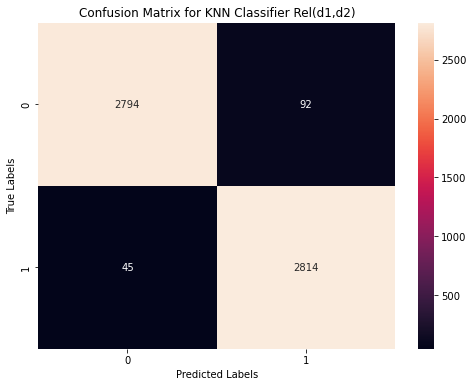

In [80]:
cm = confusion_matrix(ym_test, result2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix for KNN Classifier Rel(d1,d2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

As clear in this confusion matrix above the **highest** value is of the True Negatives (TN) which equals **2794** corect predictions and the True Positives (TP) are 2814 values whereas there were 92 False Positives (FP) and 45 False Negatives (FN) which indicates that the model was less accurate while **testing on the "datesets_subject_main_match".**

### An ensemble learner based on decision trees bagging: Random Forest

In [81]:
# Training Random forest classifier for dataset_duplicates_match column -  dup(d1,d2)

rf1 = RandomForestClassifier()

rf1.fit(xd_train, yd_train)

y1_pred = rf1.predict(xd_test)

accuracy1 = accuracy_score(yd_test, y1_pred)
precision1 = precision_score(yd_test, y1_pred)
recall1 = recall_score(yd_test, y1_pred)
f1_sc = f1_score(yd_test, y1_pred)

print("Validation Accuracy for Random Forest Classifier - Dup(d1,d2):", accuracy1)
print("Precision for Random Forest Classifier - Dup(d1,d2):", precision1)
print("Recall for Random Forest Classifier - Dup(d1,d2):", recall1)
print("F1 score for Random Forest Classifier - Dup(d1,d2):", f1_sc)

Validation Accuracy for Random Forest Classifier - Dup(d1,d2): 1.0
Precision for Random Forest Classifier - Dup(d1,d2): 1.0
Recall for Random Forest Classifier - Dup(d1,d2): 1.0
F1 score for Random Forest Classifier - Dup(d1,d2): 1.0


In [82]:
# Random forest classifier for datesets_subject_main_match column  -  Rel(d1,d2)

rf2 = RandomForestClassifier()

rf2.fit(xm_train, ym_train)

y2_pred = rf2.predict(xm_test)

accuracy2 = accuracy_score(ym_test, y2_pred)
precision2 = precision_score(ym_test, y2_pred)
recall2 = recall_score(ym_test, y2_pred)
f1_sc2 = f1_score(ym_test, y2_pred)

print("Validation Accuracy for Random Forest Classifier - Rel(d1,d2):", accuracy2)
print("Precision for Random Forest Classifier - Rel(d1,d2):", precision2)
print("Recall for Random Forest Classifier - Rel(d1,d2):", recall2)
print("F1 score for Random Forest Classifier - Rel(d1,d2):", f1_sc2)

Validation Accuracy for Random Forest Classifier - Rel(d1,d2): 0.9986074847693647
Precision for Random Forest Classifier - Rel(d1,d2): 0.9975567190226876
Recall for Random Forest Classifier - Rel(d1,d2): 0.9996502273522211
F1 score for Random Forest Classifier - Rel(d1,d2): 0.9986023759608665


Best model was **random forest** for both predictions Rel(d1,d2) and Dup(d1,d2) so, we'll use models -> rf1 and rf2

Next we will apply **cross validation to obtain better training results** hence, we should get better testing scores

In [83]:
pd.DataFrame(y1_pred).value_counts()

0    2591
1    2591
dtype: int64

In [84]:
pd.DataFrame(y2_pred).value_counts()

0    2880
1    2865
dtype: int64

## Cross Validation

In [85]:
# Dup

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores2 = cross_val_score(rf1, x_train_res_dup, y_train_res_dup, cv=kfold)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores2):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy: ", scores2.mean())

Fold 1: 1.0
Fold 2: 0.9998070243149363
Fold 3: 0.9996140486298727
Fold 4: 0.9998070243149363
Fold 5: 0.9998070243149363
Mean Accuracy:  0.9998070243149364


In [86]:
# Rel

scores = cross_val_score(rf2, x_train_res_rel, y_train_res_rel, cv=kfold)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

print("Mean Accuracy: ", scores.mean())

Fold 1: 0.9982593559617058
Fold 2: 0.9972149695387293
Fold 3: 0.9986074847693647
Fold 4: 0.9965187119234117
Fold 5: 0.9975626740947076
Mean Accuracy:  0.9976326392575838


In [87]:
# testing
test_data = test_m.copy()
#xnew_test = test_data.drop(columns=['datesets_duplicates_match','datesets_subject_main_match'])

yd_predict_test = rf1.predict(test_data)              # Dup(d1,d2)  
ym_predict_test = rf2.predict(test_data)              # Rel(d1,d2) 

test_data["Dup_match"] = yd_predict_test
test_data["Rel_match"] = ym_predict_test

C:\Users\nadin\anaconda3\envs\tensorf_gpu\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- datesets_duplicates_match
- datesets_subject_main_match
Feature names seen at fit time, yet now missing:
- cluster_duplicates
- cluster_subject_main

  warnings.warn(message, FutureWarning)
C:\Users\nadin\anaconda3\envs\tensorf_gpu\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- datesets_duplicates_match
- datesets_subject_main_match
Feature names seen at fit time, yet now missing:
- cluster_duplicates
- cluster_subject_main

  warnings.warn(message, FutureWarning)


In [88]:
print(test_data['Rel_match'].value_counts())
print(test_data['Dup_match'].value_counts())

0    22149
1      429
Name: Rel_match, dtype: int64
0    22526
1       52
Name: Dup_match, dtype: int64


This approach **yielded the closest results to our original test data** as it regarded several **observations** and lead to the model getting **better training and testing results.**

In [89]:
# original data
# Main matches for Rel(d1,d2):
#  0    22008
# 1      570
# Name: datesets_subject_main_match, dtype: int64
# Duplicate matches for Dup(d1,d2):
#  0    22450
# 1      128
# Name: datesets_duplicates_match, dtype: int64